In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import  accuracy_score

/Users/yanshuo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


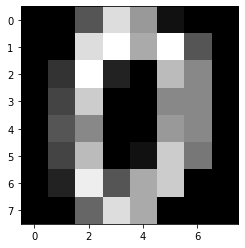

In [4]:
digits = load_digits()
data = digits.data
print(data.shape)
print(digits.images[0])
print(digits.target[0])
plt.gray()
plt.imshow(digits.images[0])
plt.show()


In [11]:
data= digits.data
target = digits.target
data1 = np.vstack((data, data, data))
target1 = np.hstack((target, target, target))
train_x,test_x,train_y,test_y = train_test_split(data1,target1,test_size=0.25)
ss = StandardScaler()
train_ss_scaled = ss.fit_transform(train_x)
test_ss_scaled = ss.transform(test_x)

mm = MinMaxScaler()
train_mm_scaled = mm.fit_transform(train_x)
test_mm_scaled = mm.transform(test_x)

In [12]:
models = {}
models['knn']= KNeighborsClassifier()
models['svm']=SVC()
models['bayes']=MultinomialNB()
models['tree']=DecisionTreeClassifier()
models['ada']=AdaBoostClassifier(base_estimator=models['tree'],learning_rate=0.1)
for model_key in models.keys():
    if model_key == 'knn' or model_key=='svm' or model_key =='ada':
        model = models[model_key]
        model.fit(train_ss_scaled,train_y)
        predict = model.predict(test_ss_scaled)
        print(model_key,accuracy_score(test_y,predict))
    else:
        model = models[model_key]
        model.fit(train_mm_scaled,train_y)
        predict = model.predict(test_mm_scaled)
        print(model_key,accuracy_score(test_y,predict))

knn 0.9814540059347181
svm 1.0
bayes 0.9050445103857567
tree 0.9933234421364985
ada 0.9933234421364985


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

In [18]:
pd.set_option('display.max_columns', None)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [20]:
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
data.drop("id",axis=1,inplace=True)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


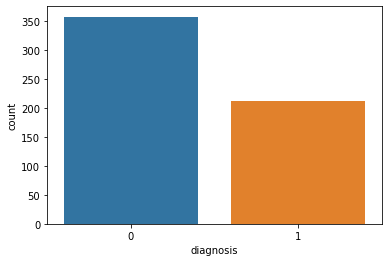

In [21]:
sns.countplot(data['diagnosis'],label="Count")
plt.show()


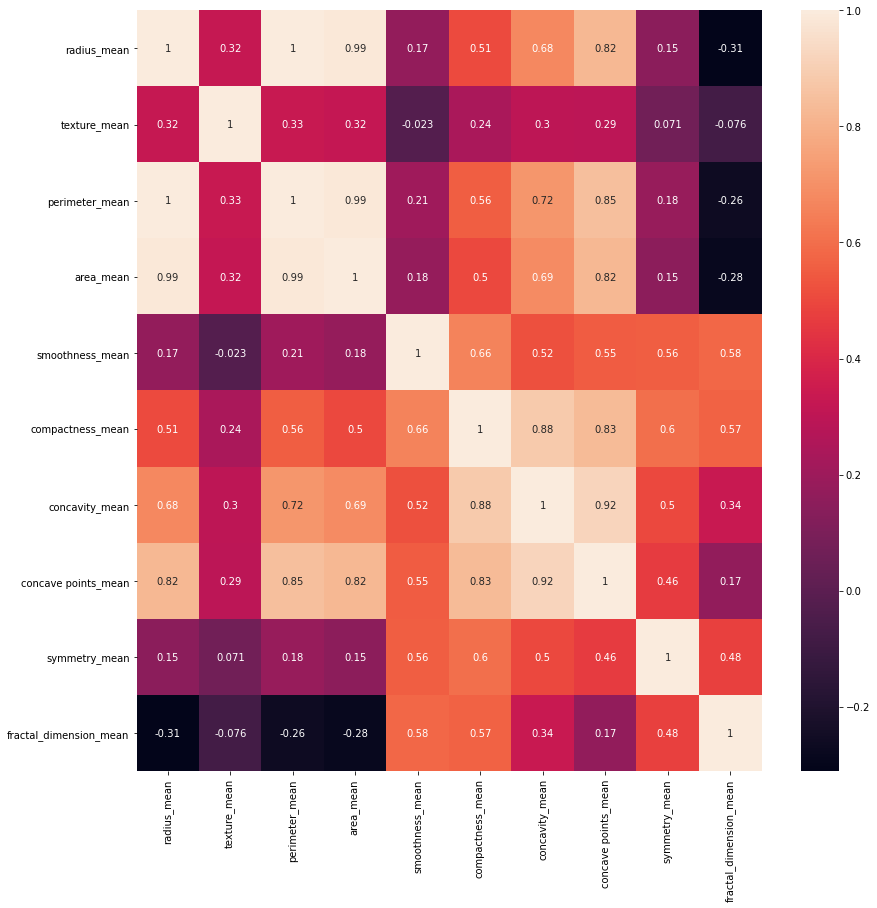

In [22]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
plt.show()

In [24]:
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']
train, test = train_test_split(data, test_size = 0.3)
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']

ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)


In [28]:
import sklearn.svm as svm
from  sklearn import metrics
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(prediction,test_y))

准确率:  0.9239766081871345


In [29]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
# 输入数据
data = pd.read_csv('data.csv', encoding='gbk')
train_x = data[["2019年国际排名","2018世界杯","2015亚洲杯"]]
df = pd.DataFrame(train_x)
kmeans = KMeans(n_clusters=3)
# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
# kmeans算法
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类'},axis=1,inplace=True)
print(result)


In [41]:
def load_data(filepath):
    f = open(filepath,'rb')
    data = []
    img = image.open(f)
    width, height = img.size
    for x in range(width):
        for y in range(height):
            c1,c2,c3 = img.getpixel((x,y))
            data.append([c1,c2,c3])
    f.close()
    mm = preprocessing.MinMaxScaler()
    data = mm.fit_transform(data)
    return np.mat(data),width,height
img, width, height = load_data('./weixin.jpg')


In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(img)
label = kmeans.predict(img)
label = label.reshape([width,height])
pic_mark = image.new('L',(width,height))
for x in range(width):
    for y in range(height):
        pic_mark.putpixel((x,y),int(256/(label[x][y]+1))-1)
pic_mark.save('wiexin_mark.jpg',"JPEG")

In [48]:
from skimage import color
label_color = (color.label2rgb(label)*255).astype(np.uint8)
label_color = label_color.transpose(1,0,2)
images = image.fromarray(label_color)
images.save('weixin_mark_color.jpg')

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


In [49]:
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.image as mpimg
# 加载图像，并对数据进行规范化
def load_data(filePath):    
    # 读文件    
    f = open(filePath,'rb')    
    data = []    
    # 得到图像的像素值    
    img = image.open(f)    
    # 得到图像尺寸    
    width, height = img.size    
    for x in range(width):        
        for y in range(height):            
            # 得到点(x,y)的三个通道值            
            c1, c2, c3 = img.getpixel((x, y))            
            data.append([(c1+1)/256.0, (c2+1)/256.0, (c3+1)/256.0])    
    f.close()    
    return np.mat(data), width, height
# 加载图像，得到规范化的结果imgData，以及图像尺寸
img, width, height = load_data('./weixin.jpg')
# 用K-Means对图像进行16聚类
kmeans =KMeans(n_clusters=16)
label = kmeans.fit_predict(img)
# 将图像聚类结果，转化成图像尺寸的矩阵
label = label.reshape([width, height])
# 创建个新图像img，用来保存图像聚类压缩后的结果
img=image.new('RGB', (width, height))
for x in range(width):    
    for y in range(height):        
        c1 = kmeans.cluster_centers_[label[x, y], 0]        
        c2 = kmeans.cluster_centers_[label[x, y], 1]        
        c3 = kmeans.cluster_centers_[label[x, y], 2]        
        img.putpixel((x, y), (int(c1*256)-1, int(c2*256)-1, int(c3*256)-1))
img.save('weixin_new.jpg')


In [52]:
data = [['牛奶','面包','尿布'],
           ['可乐','面包', '尿布', '啤酒'],
           ['牛奶','尿布', '啤酒', '鸡蛋'],
           ['面包', '牛奶', '尿布', '啤酒'],
           ['面包', '牛奶', '尿布', '可乐']]


In [53]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [54]:
transEn = TransactionEncoder()
oht_ary = transEn.fit_transform(data)
new_data = pd.DataFrame(oht_ary,columns=transEn.columns_)
new_data

,可乐,啤酒,尿布,牛奶,面包,鸡蛋
0,False,False,True,True,True,False
1,True,True,True,False,True,False
2,False,True,True,True,False,True
3,False,True,True,True,True,False
4,True,False,True,True,True,False


In [56]:
frequent_itemset = apriori(new_data,min_support=0.5,use_colnames=True)
frequent_itemset


,support,itemsets
0,0.6,(啤酒)
1,1.0,(尿布)
2,0.8,(牛奶)
3,0.8,(面包)
4,0.6,"(尿布, 啤酒)"
5,0.8,"(尿布, 牛奶)"
6,0.8,"(尿布, 面包)"
7,0.6,"(面包, 牛奶)"
8,0.6,"(尿布, 面包, 牛奶)"


In [57]:
rules = association_rules(frequent_itemset,metric='confidence',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(啤酒),(尿布),0.6,1.0,0.6,1.0,1.0,0.0,inf
1,(牛奶),(尿布),0.8,1.0,0.8,1.0,1.0,0.0,inf
2,(面包),(尿布),0.8,1.0,0.8,1.0,1.0,0.0,inf
3,"(面包, 牛奶)",(尿布),0.6,1.0,0.6,1.0,1.0,0.0,inf


In [73]:
bank = pd.DataFrame()
bank['id']=[1,1,1,2,2]
bank['fin']=['a','b','c','d','e']
def encode_unit(x):
    if x <= 0:
        return 0
    if x >=1 :
        return 1

In [75]:
bankset = bank.groupby(['id','fin']).size().unstack().reset_index().set_index('id').fillna(0)
bank_data = bankset.applymap(encode_unit)
bank_data

fin,a,b,c,d,e
id,,,,,
1,1,1,1,0,0
2,0,0,0,1,1


In [78]:
frequent_itemset = apriori(bank_data,min_support=0.5,use_colnames=True)
frequent_itemset


,support,itemsets
0,0.5,(a)
1,0.5,(b)
2,0.5,(c)
3,0.5,(d)
4,0.5,(e)
5,0.5,"(a, b)"
6,0.5,"(a, c)"
7,0.5,"(c, b)"
8,0.5,"(e, d)"
9,0.5,"(a, c, b)"


In [83]:
rules = association_rules(frequent_itemset,metric='confidence',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(b),0.5,0.5,0.5,1.0,2.0,0.25,inf
1,(b),(a),0.5,0.5,0.5,1.0,2.0,0.25,inf
2,(a),(c),0.5,0.5,0.5,1.0,2.0,0.25,inf
3,(c),(a),0.5,0.5,0.5,1.0,2.0,0.25,inf
4,(c),(b),0.5,0.5,0.5,1.0,2.0,0.25,inf
5,(b),(c),0.5,0.5,0.5,1.0,2.0,0.25,inf
6,(e),(d),0.5,0.5,0.5,1.0,2.0,0.25,inf
7,(d),(e),0.5,0.5,0.5,1.0,2.0,0.25,inf
8,"(a, c)",(b),0.5,0.5,0.5,1.0,2.0,0.25,inf
9,"(a, b)",(c),0.5,0.5,0.5,1.0,2.0,0.25,inf


In [95]:
from lxml import etree
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import csv
def dowloaddata(director):

    # 浏览器模拟
    driver = webdriver.Chrome(ChromeDriverManager().install())

        
       
     # 写入csv文件
    file_name = './' + director + '.csv'
    out = open(file_name,'w', newline='', encoding='utf-8-sig')
    csv_write = csv.writer(out, dialect='excel')
    flags = []
    """下载某个指定页面的数据"""
    def download(request_url):

        driver.get(request_url)
        time.sleep(1)

        html = driver.find_element_by_xpath("//*").get_attribute("outerHTML")
        html = etree.HTML(html)

        # 设置电影名称，导演演员的XPATH
        movie_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']") 
        name_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='meta abstract_2']") # 获取返回的数据个数

        # 获取返回的数据个数
        num = len(movie_lists)
        if num > 15:   # 第一页会有16条数据, 第一条是导演的介绍
            # 默认第一个不是，所以需要去掉
            movie_lists = movie_lists[1:]
            name_lists = name_lists[1:]

        for (movie, name_list) in zip(movie_lists, name_lists):
            # 会存在数据为空的情况
            if name_list.text is None:
                continue
            print(name_list.text)
            names = name_list.text.split('/')

            # 判断导演是否为指定的director
            if names[0].strip() == director and movie.text not in flags:
                # 将第一个字段设置为电影名称
                names[0] = movie.text
                flags.append(movie.text)
                csv_write.writerow(names)

        if num >=14:   # 有可能一页会有14个电影
            # 继续下一页
            return True
        else:
            # 没有下一页
            return False
    
    # 开始的ID为0， 每页增加15个
    base_url = 'https://movie.douban.com/subject_search?search_text='+director+'&cat=1002&start='
    start = 0
    while start < 10000:  # 最多抽取10000部电影
        request_url = base_url + str(start)

        # 下载数据，并返回是否有下一页
        flag = download(request_url)
        if flag:
            start = start + 15
        else:
            break
    out.close()
    print('finished')

"""调用上面的函数"""
directorname = '宁浩'
dowloaddata(directorname)

director = '宁浩'
file_name = './'+director+'.csv'
lists = csv.reader(open(file_name, 'r', encoding='utf-8-sig'))






====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/yanshuo/.wdm/drivers/chromedriver/mac64/91.0.4472.101/chromedriver] found in cache


文牧野 / 徐峥 / 王传君 / 周一围 / 谭卓 / 章宇 / 杨新鸣 / 王佳佳 / 王砚辉
郭帆 / 屈楚萧 / 吴京 / 李光洁 / 吴孟达 / 赵今麦 / 隋凯 / 屈菁菁 / 张亦驰
宁浩 / 徐峥 / 黄渤 / 余男 / 多布杰 / 王双宝 / 巴多 / 杨新鸣 / 郭虹
陈凯歌 / 张一白 / 管虎 / 薛晓路 / 徐峥 / 宁浩 / 文牧野 / 黄渤 / 张译 / 韩昊霖 / 杜江 / 葛优 / 刘昊然 / 宋佳 / 王千源
宁浩 / 黄渤 / 沈腾 / 汤姆·派福瑞 / 马修·莫里森 / 徐峥 / 于和伟 / 雷佳音 / 刘桦
宁浩 / 郭涛 / 刘桦 / 连晋 / 黄渤 / 徐峥 / 优恵 / 罗兰  / 王迅
宁浩 / 徐峥 / 陈思诚 / 闫非 / 彭大魔 / 邓超 / 俞白眉 / 葛优 / 黄渤 / 范伟 / 沈腾 / 张占义 / 王宝强
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
宁浩 / 黄渤 / 戎祥 / 九孔 / 徐峥 / 王双宝 / 巴多 / 董立范 / 高捷
管虎 / 冯小刚 / 许晴 / 张涵予 / 刘桦 / 李易峰 / 吴亦凡 / 梁静 / 白举纲
宁浩 / 黄渤 / 徐峥 / 袁泉 / 周冬雨 / 陶慧 / 岳小军 / 沈腾 / 张俪
许鞍华 / 叶德娴 / 刘德华 / 秦海璐 / 秦沛 / 黄秋生 / 王馥荔 / 朱慧敏 / 江美仪
宁浩 / 雷佳音 / 陶虹 / 程媛媛 / 山崎敬一 / 郭涛 / 范伟 / 孙淳 / 刘桦
张一白 / 韩琰 / 李炳强 / 彭昱畅 / 张婧仪 / 梁靖康 / 周依然 / 张宥浩 / 郭丞 / 周游 / 黄觉
宁浩 / 李强
丁晟 / 王凯 / 马天宇 / 王大陆 / 余皑磊 / 林雪 / 吴樾 / 李梦 / 张艺上
乌尔善 / 安藤政信 / 张雨绮 / 游本昌 / 刘晓晔 / 徐冲 / 韩鹏翼 / 刘桦 / 宁浩
张一白 / 李亚鹏 / 徐静蕾 / 王学兵 / 何洁 / 程伊 / 崔达治 / 优恵 / 陈明
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
叶烽 / 王自健 / 中孝介 / 宁浩 / 李东学 / 黄龄 / 宋丹丹 / 王雷 / 范明
宁浩 / 达瓦 / 毕力格 / 戈利班
宁浩 / 张子贤 

In [96]:
data = []
for names in lists:
    name_new = []
    for name in names:
        # 去掉演员数据中的空格
        name_new.append(name.strip())
    data.append(name_new[1:])


In [101]:
import pandas as pd

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
trans_mo = TransactionEncoder()
mov = trans_mo.fit_transform(data)
new_mov = pd.DataFrame(mov, columns=trans_mo.columns_)
new_mov

,九孔,于和伟,优恵,余男,俞白眉,傅羽鸽,关宇,刘德华,刘桦,周冬雨,唐笑笑,多布杰,孙淳,孙麒鹏,山崎敬一,岳小军,巴多,常爱军,张俪,张占义,张子贤,彭大魔,徐峥,戈利班,戎祥,李世成,李嘉宇,李强,杨新鸣,毕力格,毕秀茹,汤姆·派福瑞,沈腾,王双宝,王宝强,王晶晶,王柏伦,王迅,程媛媛,罗兰,聂鑫,范伟,葛优,董立范,蔡鹭,袁泉,达瓦,连晋,邓超,郝宜珊,郭涛,郭虹,闫非,陈思诚,陶慧,陶虹,雷佳音,马修·莫里森,高捷,黄渤
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
itemset = apriori(new_mov,min_support=0.3,use_colnames=True)
itemset

,support,itemsets
0,0.3750,(徐峥)
1,0.4375,(黄渤)
2,0.3750,"(黄渤, 徐峥)"


In [108]:
rules = association_rules(itemset,metric='confidence',min_threshold=1)

In [109]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(徐峥),(黄渤),0.375,0.4375,0.375,1.0,2.285714,0.210938,inf


In [111]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


In [112]:
data_ori = pd.read_csv('heros.csv',encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text

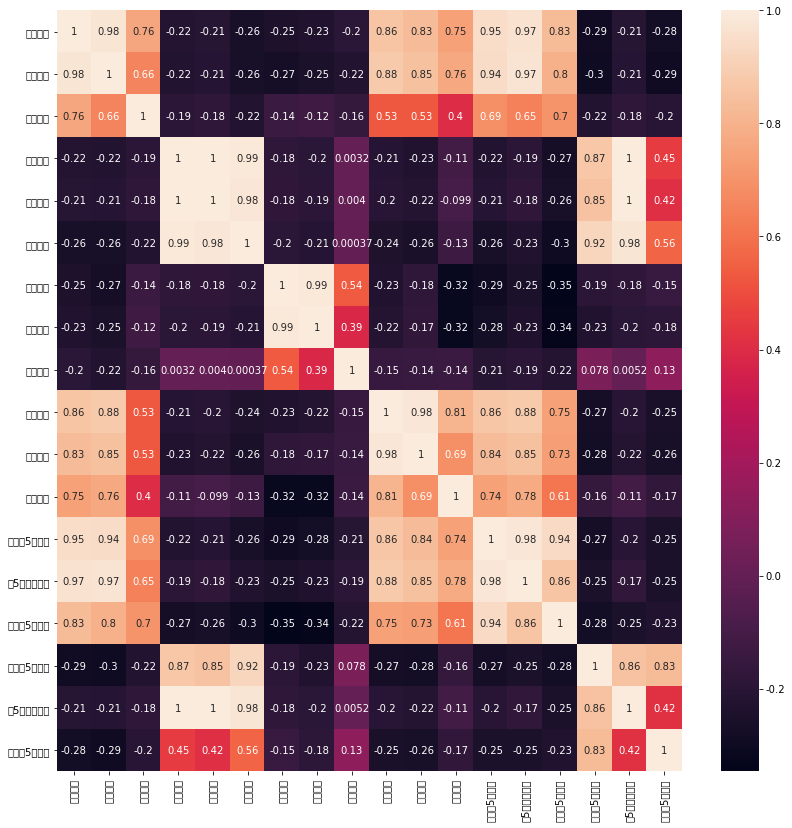

In [114]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
corr = data[features].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
plt.show()

In [115]:
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]


In [116]:
data['最大攻速'] = data['最大攻速'].apply(lambda x:float(x.strip('%'))/100)
data['攻击范围']=data['攻击范围'].map({'远程':1,'近战':0})
ss = StandardScaler()
data = ss.fit_transform(data)


/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
gmm = GaussianMixture(n_components=30,covariance_type='full')
gmm.fit(data)
prediction = gmm.predict(data)
print(prediction)

[13 23 27 25  7  7 11  9  2 23 12 23 25 19 24 12 10  2  4 22  5  8 22  8
  8  8 22 20  1  6 19  6  6  1  6  6  1 16 17 18 18  1  1  6  1 18 23 17
 23  1 21 10  4  3  3 13 10  0 28  7 10  4 15 13 14 29 29 26 20]


In [120]:
data_ori

,分组,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,13,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,23,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,27,张飞,8341,329.4,3450,100,0,100,301,10.570,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,25,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,394,20.36,109,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,7,吕布,7344,270.0,3564,0,0,0,343,12.360,170,390,20.79,99,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,14,阿轲,5968,192.8,3269,0,0,0,427,17.860,177,349,18.57,89,81,2.214,50,0,0.000,0,28.00%,近战,刺客,NaN
65,29,娜可露露,6205,211.9,3239,1808,97,450,385,15.140,173,359,19.50,86,79,2.286,47,38,1.571,16,14.00%,近战,刺客,NaN
66,29,兰陵王,6232,210.0,3292,1822,98,450,388,15.500,171,342,18.36,85,99,3.357,52,46,1.929,19,14.00%,近战,刺客,NaN
67,26,铠,6700,237.5,3375,1784,96,440,328,10.860,176,388,20.07,107,81,2.643,44,38,1.571,16,28.00%,近战,战士,坦克


In [123]:
import networkx as nx
G = nx.DiGraph()
edges = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "A"), ("B", "D"), ("C", "A"), ("D", "B"), ("D", "C")]

for edge in edges:
    G.add_edge(edge[0],edge[1])
pagerank_list = nx.pagerank(G,alpha=1)
pagerank_list

{'A': 0.33333396911621094,
 'B': 0.22222201029459634,
 'C': 0.22222201029459634,
 'D': 0.22222201029459634}

In [124]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


In [132]:
emails = pd.read_csv('Emails.csv')
file = pd.read_csv('Aliases.csv')
aliases ={}
for index,row in file.iterrows():
    aliases[row['Alias']]=row['PersonId']
file = pd.read_csv('Persons.csv')
person={}
for index,row in file.iterrows():
    person[row['Id']]=row['Name']

In [128]:
def unify_name(name):
    name = str(name).lower()
    name = name.replace(',','').split('@')[0]
    if name in aliases.keys():
        return person[aliases[name]]
    return name


In [140]:
def show_graph(graph,layout='spring_layout'):
    if layout == 'circular_layout':
        positions = nx.circular_layout(graph)
    else:
        positions = nx.spring_layout(graph)
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    nx.draw_networkx_nodes(graph,positions,node_size=nodesize,alpha=0.4)
    nx.draw_networkx_edges(graph, positions,  alpha=0.2)
    nx.draw_networkx_labels(graph,positions,font_size=10)
    plt.show()


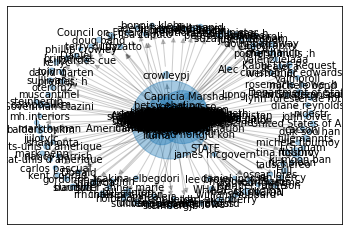

In [141]:
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom,emails.MetadataTo,emails.RawText):
    temp = (row[0],row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

edges_weights = [(key[0],key[1],val) for key,val in edges_weights_temp.items()]
graph = nx.DiGraph()
graph.add_weighted_edges_from(edges_weights)
pagerank = nx.pagerank(graph)
nx.set_node_attributes(graph,name='pagerank',values=pagerank)
show_graph(graph)

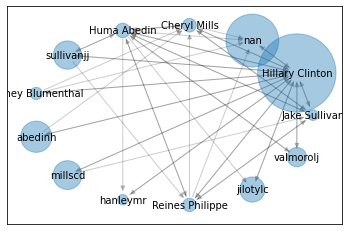

In [144]:
pagerank_threhold = 0.005
small_graph = graph.copy()
for n,p_rank in graph.nodes(data=True):
    if p_rank['pagerank']<pagerank_threhold:
        small_graph.remove_node(n)
show_graph(small_graph,'circular_layout')

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [171]:
iris = load_iris()
X = iris.data 
X_norm = StandardScaler().fit_transform(X)
X_norm.mean(axis=0) 


array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [180]:
ew

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [185]:
ew,ev = np.linalg.eig(np.cov(X_norm.T)) 
ew_order = np.argsort(ew)[::-1]
ew_sort = ew[ew_order]
ev_sort = ev[:,ew_order]


(4, 4)

In [186]:
K = 2
V = ev_sort[:,:2]
X_new = X_norm.dot(V)

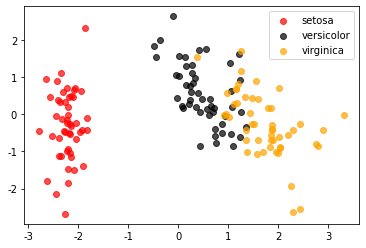

In [188]:
colors = ['red', 'black', 'orange']
plt.figure()
for  i in [0,1,2]:
    plt.scatter(X_new[iris.target==i,0],X_new[iris.target==i, 1],alpha=.7,c=colors[i],label=iris.target_names[i])

plt.legend()


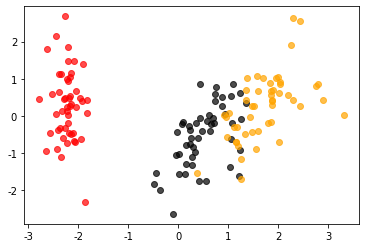

In [190]:
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_new[iris.target==i, 0],X_new[iris.target==i, 1],alpha=.7,c=colors[i],label=iris.target_names[i])


In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_norm)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[2.93808505 0.9201649 ]
[0.72962445 0.22850762]
0.9581320720000164


In [202]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [203]:
faces = fetch_lfw_people(min_faces_per_person=1)
faces.images.shape

UnidentifiedImageError: cannot identify image file '/Users/yanshuo/scikit_learn_data/lfw_home/lfw_funneled/George_W_Bush/George_W_Bush_0064.jpg'

In [206]:
fig,axes = plt.subplots(3,8,figsize=(8,4),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap='gray')
pca = PCA(150).fit(faces.data)
V= pca.components_
V.shape


In [ ]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap='gray')
X_dr = pca.transform(faces.data)
X_inverse= pca.inverse_transform(X_dr)
X_inverse.shape

In [210]:
import numpy as np
import scipy.sparse    
import pickle
import xgboost as xgb



XGBoostError: [16:19:57] src/io/local_filesys.cc:104: LocalFileSystem.ListDirectory demo/data error: No such file or directory
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000001a1c7c9e89 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x0000001a1c8b7e1a dmlc::io::LocalFileSystem::ListDirectory(dmlc::io::URI const&, std::__1::vector<dmlc::io::FileInfo, std::__1::allocator<dmlc::io::FileInfo> >*) + 426
  [bt] (2) 3   libxgboost.dylib                    0x0000001a1c8a0d36 dmlc::io::InputSplitBase::ConvertToURIs(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&) + 582
  [bt] (3) 4   libxgboost.dylib                    0x0000001a1c89fe05 dmlc::io::InputSplitBase::InitInputFileInfo(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, bool) + 69
  [bt] (4) 5   libxgboost.dylib                    0x0000001a1c89fbb2 dmlc::io::InputSplitBase::Init(dmlc::io::FileSystem*, char const*, unsigned long, bool) + 210
  [bt] (5) 6   libxgboost.dylib                    0x0000001a1c8b15fb dmlc::io::LineSplitter::LineSplitter(dmlc::io::FileSystem*, char const*, unsigned int, unsigned int) + 283
  [bt] (6) 7   libxgboost.dylib                    0x0000001a1c8af2f0 dmlc::InputSplit::Create(char const*, char const*, unsigned int, unsigned int, char const*, bool, int, unsigned long, bool) + 704
  [bt] (7) 8   libxgboost.dylib                    0x0000001a1c8af022 dmlc::InputSplit::Create(char const*, unsigned int, unsigned int, char const*) + 34
  [bt] (8) 9   libxgboost.dylib                    0x0000001a1c8bd3fe dmlc::Parser<unsigned int, float>* dmlc::data::CreateLibSVMParser<unsigned int, float>(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, std::__1::map<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&, unsigned int, unsigned int) + 46

